### Importing libraries and package

In [34]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from pmdarima import auto_arima
import pickle
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [4]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [17]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv', parse_dates = [0], index_col = [0])
df.head()

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0


In [6]:
df.head()

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0


In [18]:
df.tail()

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1975-09,817.0
1975-10,827.0
1975-11,797.0
1975-12,843.0
Monthly milk production: pounds per cow. Jan 62 ? Dec 75,NaN


In [56]:
df.columns = ['Month', 'Milk in pounds per cow']

In [57]:
df.drop(168,axis = 0,inplace = True)

In [58]:
df['Month'] = pd.to_datetime(df['Month'])

In [59]:
df['Month']

0     1962-01-01
1     1962-02-01
2     1962-03-01
3     1962-04-01
4     1962-05-01
         ...    
163   1975-08-01
164   1975-09-01
165   1975-10-01
166   1975-11-01
167   1975-12-01
Name: Month, Length: 168, dtype: datetime64[ns]

In [60]:
df.set_index('Month',inplace=True)

In [61]:
df

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


### Exploring Data Analysis(EDA)

In [19]:
df.dtypes

Monthly milk production: pounds per cow. Jan 62 ? Dec 75    float64
dtype: object

In [20]:
df.shape

(169, 1)

In [21]:
df.isna().sum()

Monthly milk production: pounds per cow. Jan 62 ? Dec 75    1
dtype: int64

In [22]:
df.describe()

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [49]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monthly milk production: pounds per cow. Jan 62 ? Dec 75,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [62]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

<Axes: xlabel='Month'>

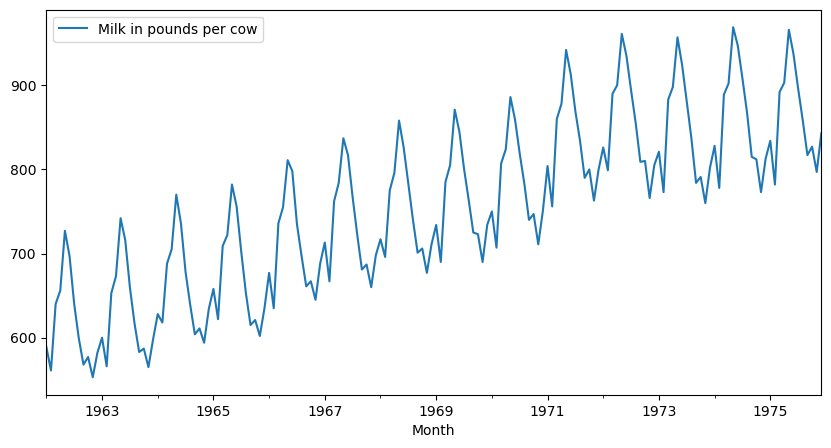

In [63]:
df.plot()

In [65]:
timeseries = df['Milk in pounds per cow']

In [66]:
type(timeseries)

pandas.core.series.Series

<Axes: xlabel='Month'>

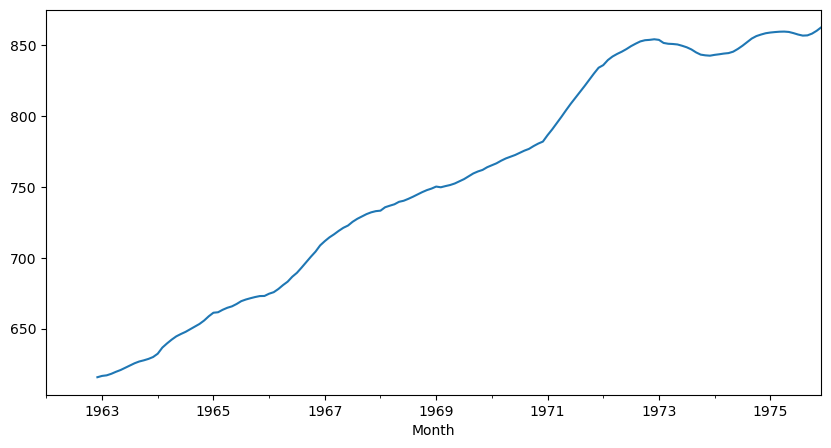

In [67]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')

<Axes: xlabel='Month'>

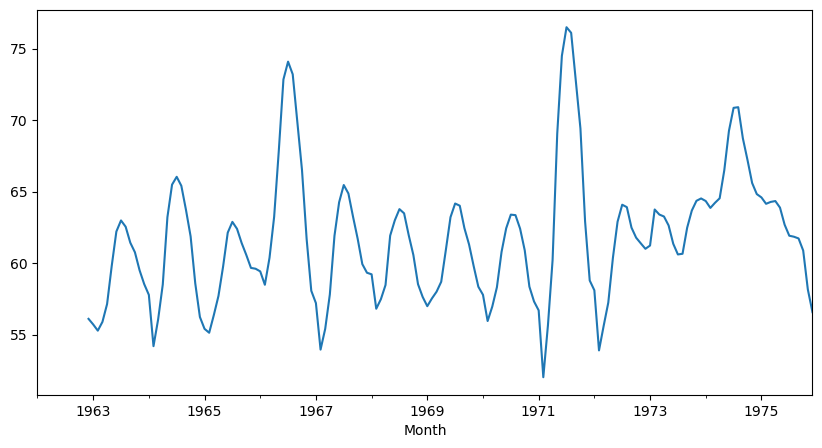

In [68]:
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')

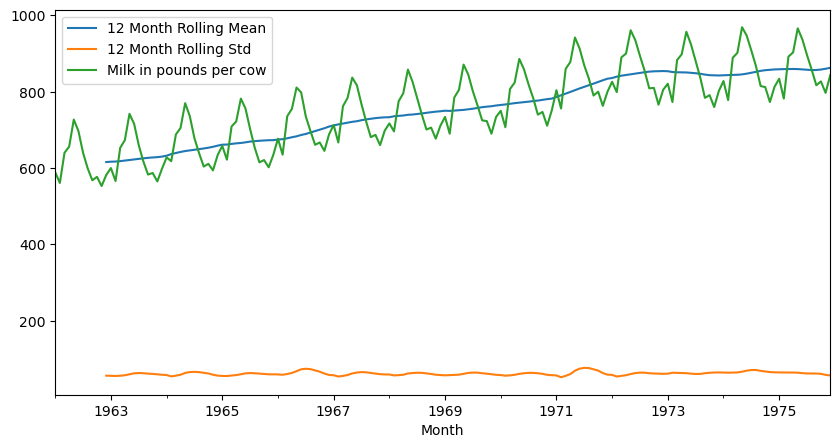

In [69]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

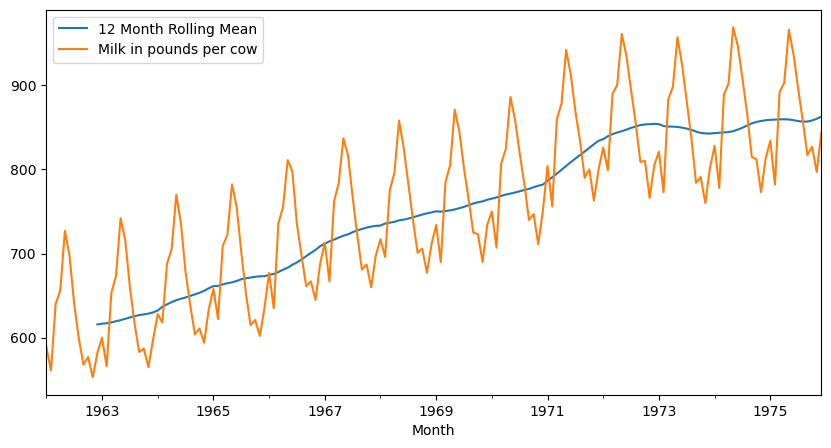

In [70]:
timeseries.rolling(12).mean().plot(label = '12 Month Rolling Mean')
timeseries.plot()
plt.legend()

### Data Visualization

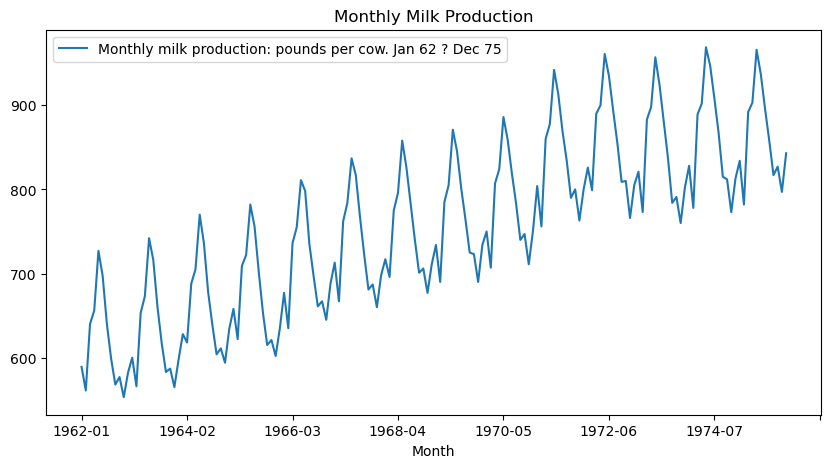

In [11]:
df.plot(figsize = (10,5))
plt.title('Monthly Milk Production')
plt.savefig('Monthly Milk Production.png')
plt.show()

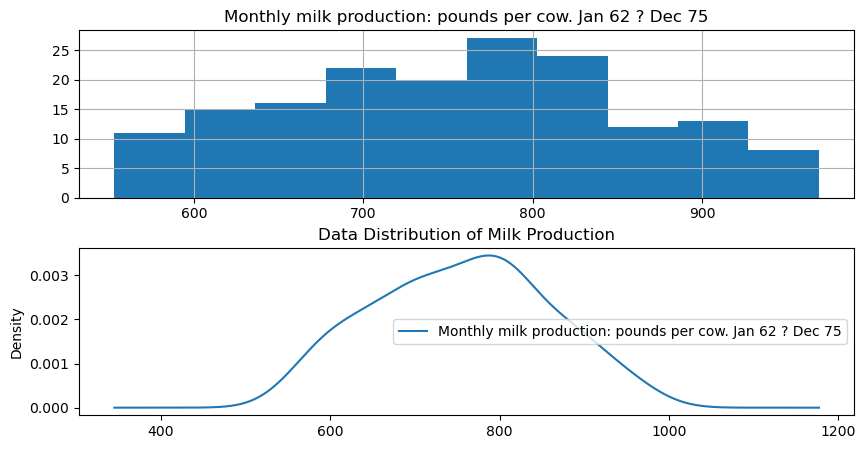

In [47]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10,5))
df.hist(ax = ax1)
df.plot(kind = 'kde', ax = ax2)
plt.title('Data Distribution of Milk Production')
plt.savefig('Data Distribution of Milk Production.png')
plt.show()

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [74]:
decomposition = seasonal_decompose(df['Milk in pounds per cow'], period=12)


<Figure size 1000x500 with 0 Axes>

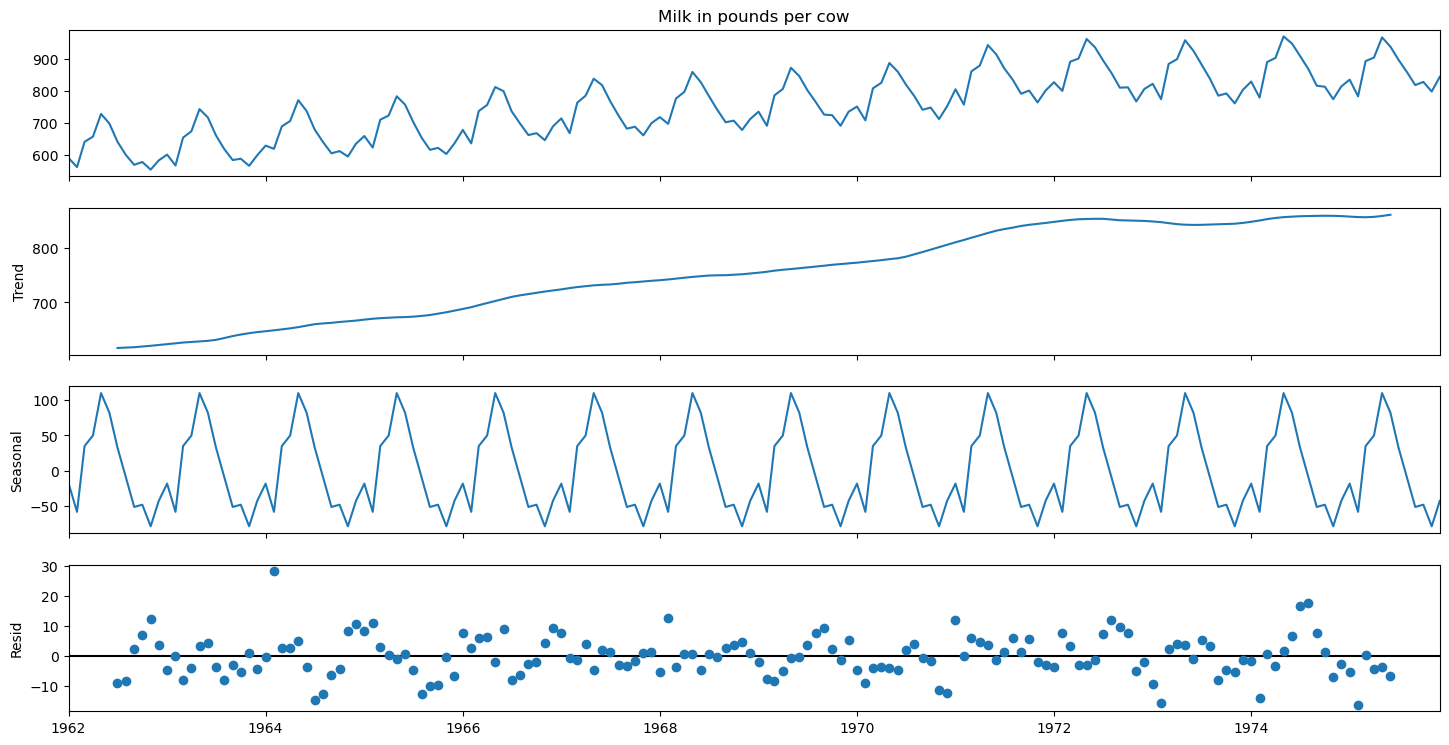

In [75]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [77]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


### Data Transformation 

In [78]:
result = adfuller(df['Milk in pounds per cow'])

In [79]:
labels = ['ADF Test Statistic',
          'p-value',
          '#Lags Used',
          'Number of Observations Used']

In [80]:
labels

['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

In [81]:
for value,label in zip(result,labels):
    print(label+' : '+str(value) )

ADF Test Statistic : -1.3038115874221228
p-value : 0.6274267086030347
#Lags Used : 13
Number of Observations Used : 154


In [82]:
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [83]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [84]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

In [85]:
df['Milk First Difference'] 

Month
1962-01-01     NaN
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 168, dtype: float64

In [86]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530695
p-value : 0.030068004001785647
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

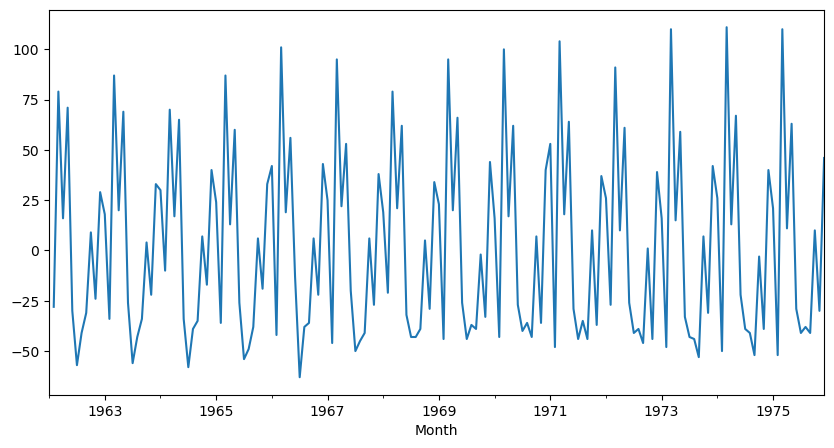

In [87]:
df['Milk First Difference'].plot()

In [88]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)

In [89]:
df['Seasonal Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01    -9.0
1975-09-01     2.0
1975-10-01    15.0
1975-11-01    24.0
1975-12-01    30.0
Name: Seasonal Difference, Length: 168, dtype: float64

<Axes: xlabel='Month'>

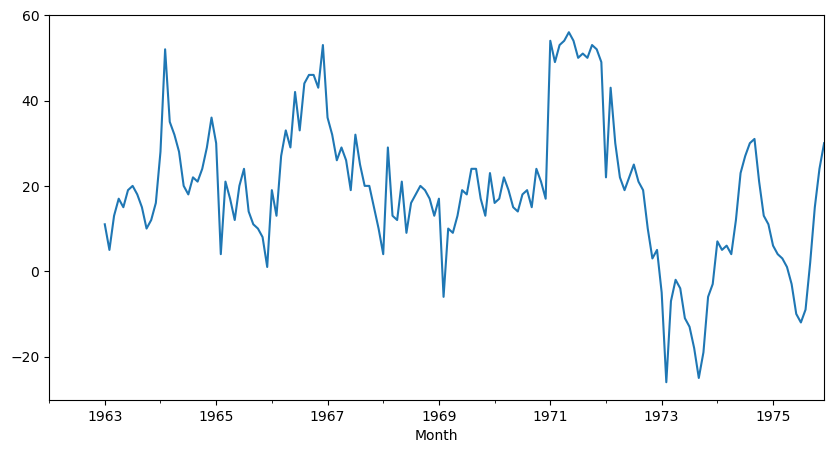

In [90]:
df['Seasonal Difference'].plot()

In [91]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3354193143593966
p-value : 0.16079880527711388
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [92]:
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)

<Axes: xlabel='Month'>

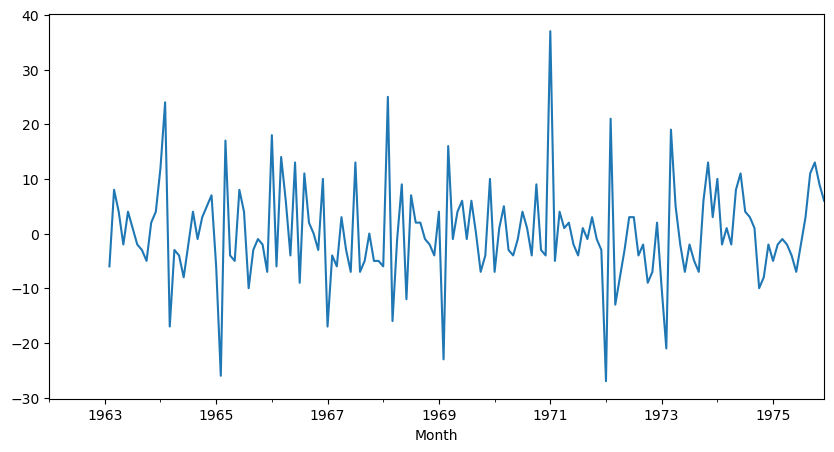

In [93]:
df['Seasonal First Difference'].plot()

In [94]:
df['Seasonal First Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01     3.0
1975-09-01    11.0
1975-10-01    13.0
1975-11-01     9.0
1975-12-01     6.0
Name: Seasonal First Difference, Length: 168, dtype: float64

In [95]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.0380022749219915
p-value : 1.865423431878764e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [96]:
df['Seasonal First Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01     3.0
1975-09-01    11.0
1975-10-01    13.0
1975-11-01     9.0
1975-12-01     6.0
Name: Seasonal First Difference, Length: 168, dtype: float64

<Axes: xlabel='Month'>

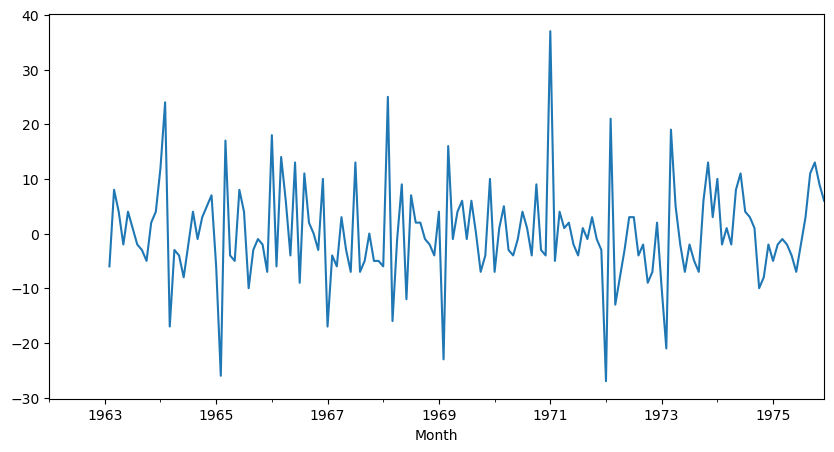

In [97]:
df['Seasonal First Difference'].plot()

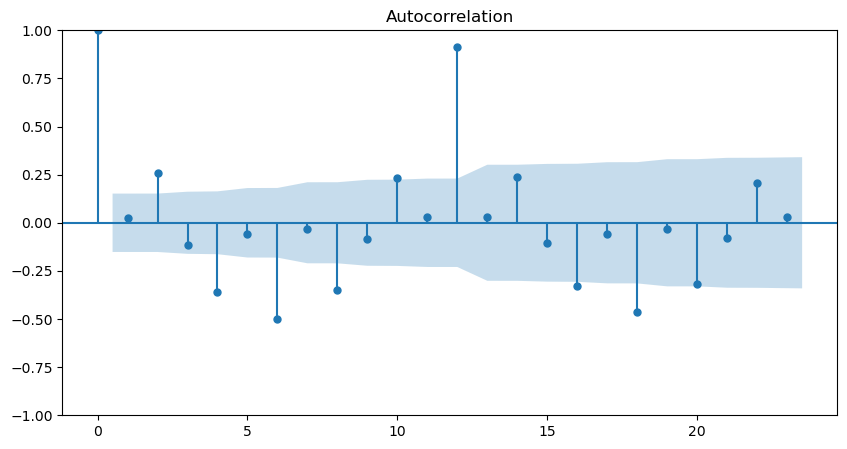

In [98]:
fig_first = plot_acf(df["Milk First Difference"].dropna())

In [99]:
k=df["Milk First Difference"].dropna()
k

Month
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
1962-06-01   -30.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 167, dtype: float64

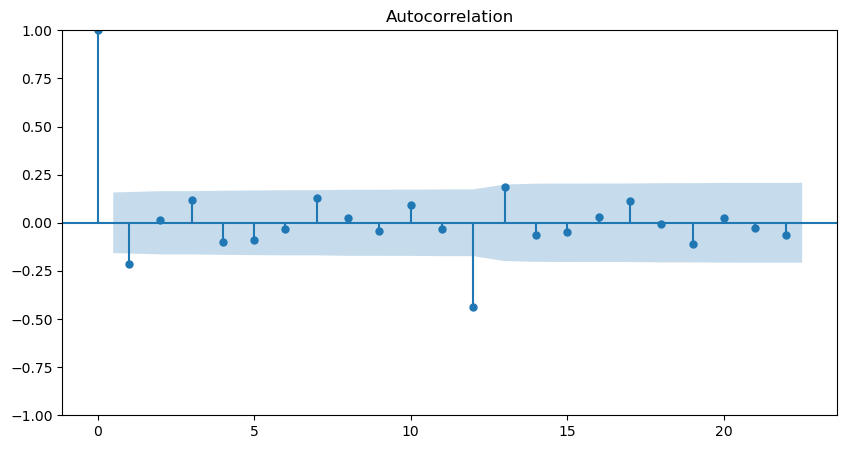

In [100]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

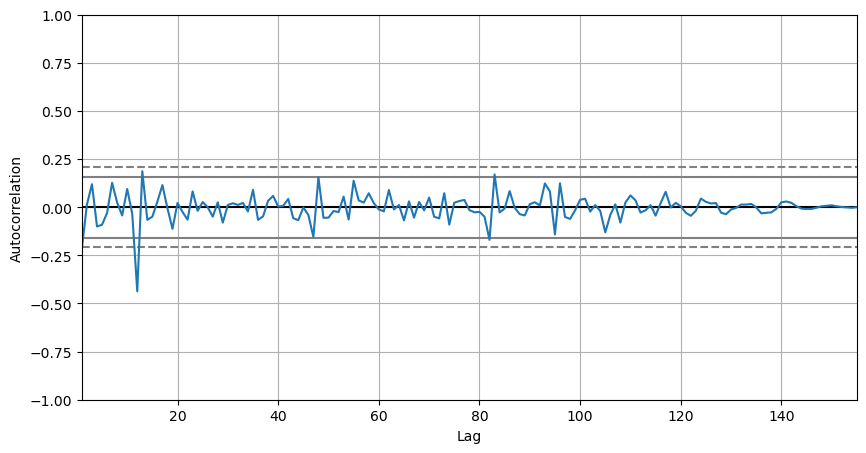

In [101]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

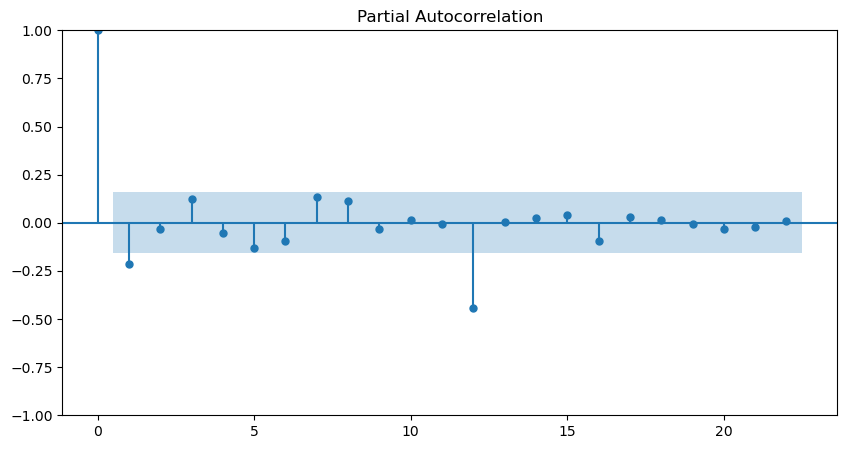

In [102]:
result = plot_pacf(df["Seasonal First Difference"].dropna())

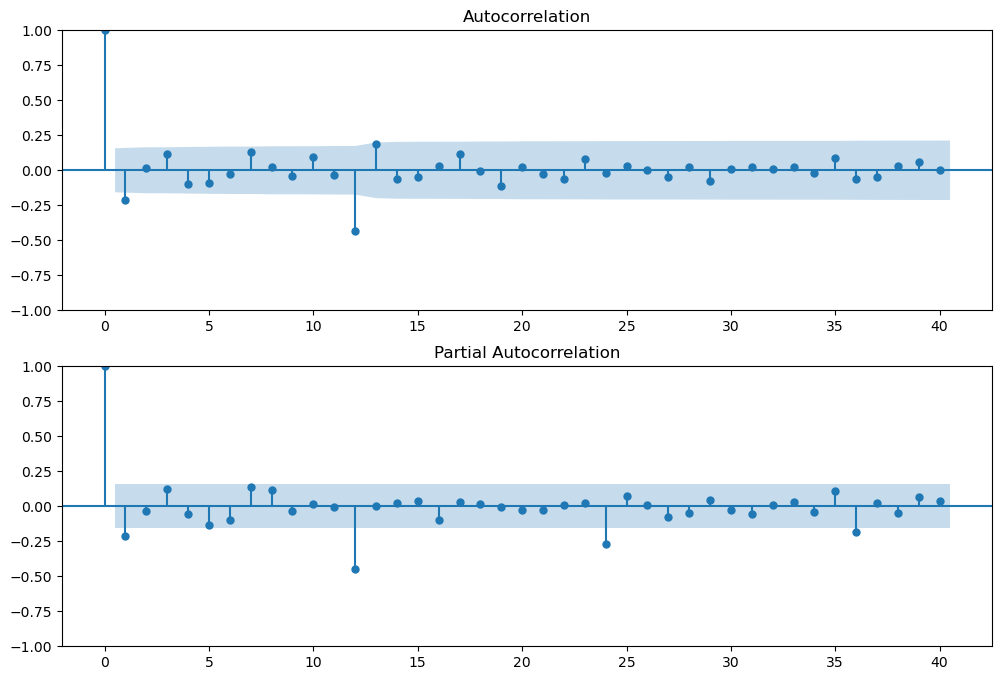

In [103]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
plot_acf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=40, ax=ax2)
plt.show()


In [104]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'], order=(0,1,0), seasonal_order=(1,1,1,12))


In [105]:
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Wed, 17 Apr 2024   AIC                           1074.131
Time:                                      14:02:49   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

<Axes: xlabel='Month'>

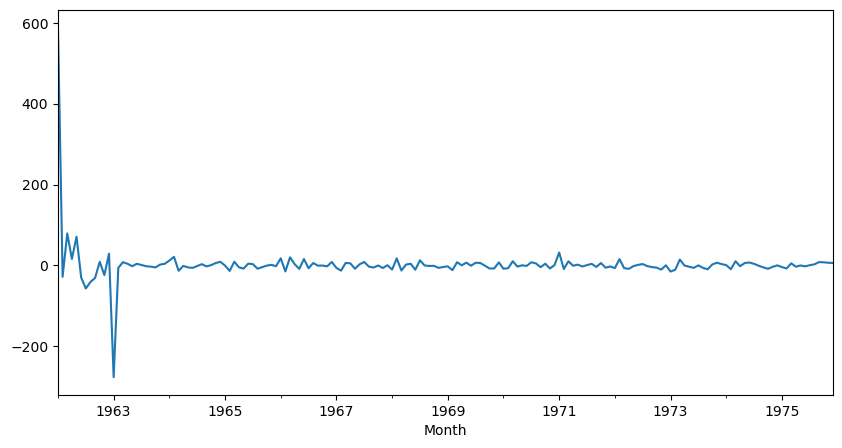

In [106]:
results.resid.plot()

### Forecasting

<Axes: xlabel='Month'>

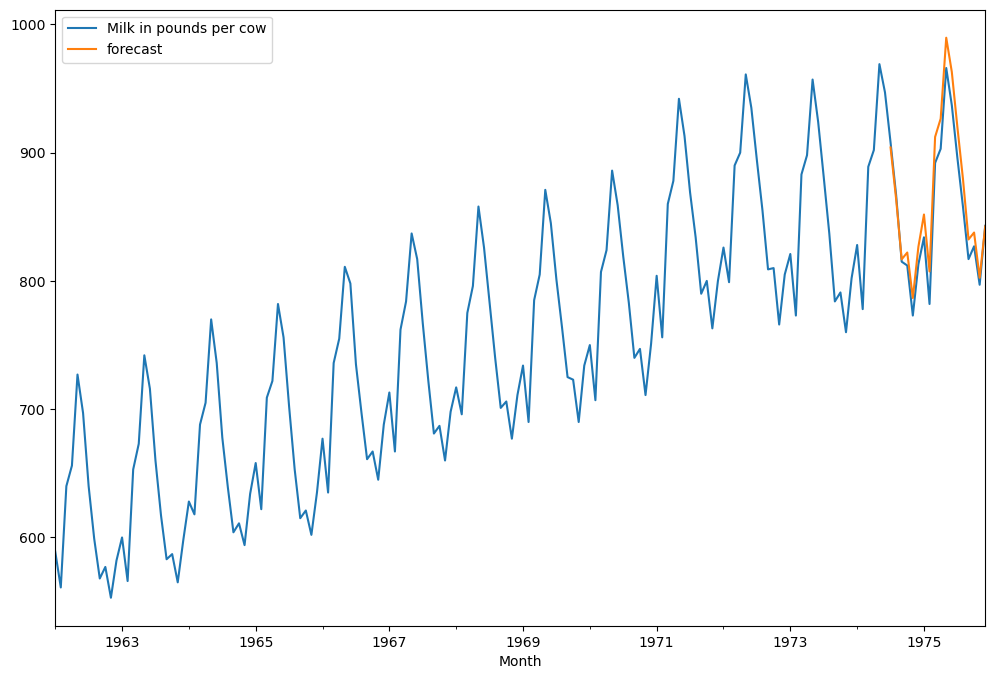

In [107]:
df['forecast'] = results.predict(start = 150,end = 168,dynamic = True)  
df[['Milk in pounds per cow','forecast']].plot(figsize = (12, 8))

In [108]:
df.tail()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,
1975-08-01,858.0,-38.0,-9.0,3.0,879.668973
1975-09-01,817.0,-41.0,2.0,11.0,832.328552
1975-10-01,827.0,10.0,15.0,13.0,837.722247
1975-11-01,797.0,-30.0,24.0,9.0,802.452734
1975-12-01,843.0,46.0,30.0,6.0,842.499868


In [110]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,24) ]

In [111]:
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0,24) ]

In [112]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [113]:
future_dates_df = pd.DataFrame(index = future_dates[1:],columns = df.columns)

In [114]:
future_df = pd.concat([df,future_dates_df])

In [115]:
future_df.head()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN,NaN


In [116]:
future_df.tail()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN


<Axes: >

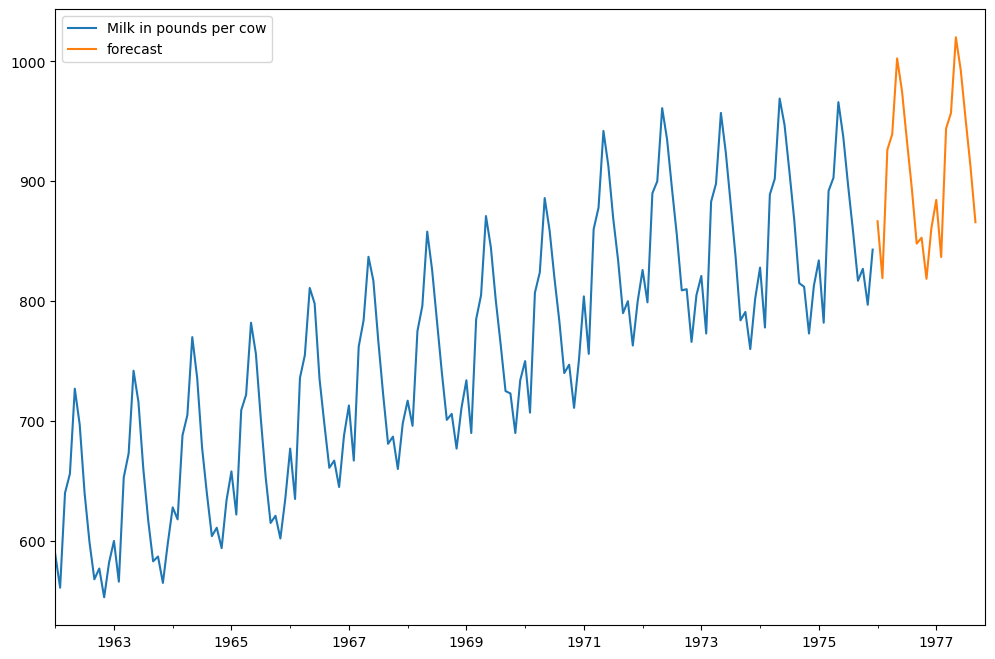

In [117]:
future_df['forecast'] = results.predict(start = 168, end = 188,dynamic= True)  
future_df[['Milk in pounds per cow', 'forecast']].plot(figsize = (12, 8)) 